# Projek 4: Clustering
Kelompokan pengguna kartu kredit berdasarkan karakteristik tertentu ke dalam beberapa cluster.
## Anggota Kelompok:
- Nabila Zulfika Hemadewi
- Vista Sasmita Padmanagara

---

### Credit Card Clustering

Bank adalah lembaga keuangan yang menghimpun dana dari masyarakat dan menyalurkan kembali dana tersebut ke masyarakat serta memberikan jasanya dalam lalulintas pembayaran dan peredaran uang. Pada umumnya Bank dikenal sebagai lembaga keuangan yang kegiatan utamanya menerima simpanan, giro, tabungan dan deposito. Kemudian bank dikenal juga sebagai tempat untuk meminjam uang (kredit) bagi masyarakat yang membutuhkannya. 

Persaingan antar-bank saat ini menjadi sangat tinggi membuat setiap perusahaan harus memiliki strategi pemasaran produk perbankannya. Segmentasi pasar adalah salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. n. Alternatif strategi terhadap kegiatan pemasaran yang dilakukan sangat diperlukan agar perusahaan semakin tumbuh dan berkembang. Strategi pemasaran yang tepat dengan menetapkan segementasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

Dataset pada project ini menggunakan credit card dataset pada kaggle https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu :

1. **CUST_ID**, Identifikasi Pemegang Kartu Kredit (Kategoris)
2. **BALANCE**, Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. **BALANCE_FREQUENCY**, Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. **PURCHASES**, Jumlah pembelian yang dilakukan dari akun
5. **ONEOFF_PURCHASES**, Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. **INSTALLMENTS_PURCHASES**, Jumlah pembelian dilakukan secara angsuran
7. **CASH_ADVANCE**, Uang tunai di muka yang diberikan oleh pengguna
8. **PURCHASES_FREQUENCY**, Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. **ONEOFF_PURCHASES_FREQUENCY**, How sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. **PURCHASES_INSTALLMENTS_FREQUENCY**, Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. **CASH_ADVANCE_FREQUENCY**, Seberapa sering uang tunai di muka dibayarkan
12. **CASH_ADVANCE_TRX**, Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
13. **PURCHASES_TRX**, Jumlah transaksi pembelian yang dilakukan
14. **CREDIT_LIMIT**, Batas Kartu Kredit untuk pengguna
15. **PAYMENTS**, Jumlah Pembayaran yang dilakukan oleh pengguna
16. **MINIMUM_PAYMENTS**, Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. **PRC_FULL_PAYMENT**, Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. **TENURE**, Jangka waktu layanan kartu kredit untuk pengguna

# Import Library & Preparing Data

In [ ]:
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")

# labelEncoder
from sklearn.preprocessing import LabelEncoder

# scaling data
from sklearn.preprocessing import RobustScaler

# splitting data
from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA

# elbow method
from yellowbrick.cluster import KElbowVisualizer

# modelling
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Evaluation Model
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# saving model
import pickle

In [ ]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/tugas_studi/CC_GENERAL.csv')
# df = df.round(2)

**Jumlah dimensi data**

In [ ]:
df.shape

(8950, 18)

**Tampilan data**

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Informasi data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

Pembersihan data adalah tahap yang sangat penting sebelum pengolahan data untuk analisis maupun modelling dilakukan. Pastikan data yang kita miliki sudah tidak mengandung missing values/invalid values, maupun data duplikat. 

In [ ]:
df.drop(columns=['CUST_ID'], inplace=True)

**Missing values**

In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat sebanyak 314 missing values dalam data, untuk ini kita bisa lakukan **dropna** atau **fillna**, tergantung pada keputusan yang sudah ditentukan. Pada kasus ini kami memutuskan untuk melakukan fillna terhadap data. CREDIT_LIMIT yang hanya memiliki 1 missing values akan diisi dengan mean(), sedangkan untuk MINIMUM_PAYMENTS yang memiliki 313 missing values akan diisi dengan median().

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
df.isnull().sum().sum()

0

Missing values berhasil teratasi!

**Duplikasi Data**

In [ ]:
df.duplicated().sum()

0

Tidak terdapat nilai duplikat dalam data.

# Exploratory Data Analysis (EDA)

**Cek statistik deskriptif**

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# df.to_csv("credit-card-general-is-clean.csv")

# Preprocessing Data

**Data Normalized**

In [ ]:
scaler = RobustScaler()
scaled_X = scaler.fit_transform(df)

feat_cols = ['feature'+str(i) for i in range (scaled_X.shape[1])]
X = pd.DataFrame(scaled_X, columns=feat_cols)

In [ ]:
X.shape

(8950, 17)

In [ ]:
X.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
8945,-0.438709,0.000000,-0.065540,-0.065812,0.431293,0.000000,0.600000,-0.277777,0.888888,0.000000,0.0,-0.0625,-0.408163,-0.350037,-0.426406,3.500004,-6.0
8946,-0.443544,0.000000,-0.057245,-0.065812,0.450241,0.000000,0.600000,-0.277777,0.888888,0.000000,0.0,-0.0625,-0.408163,-0.382803,0.000000,0.000000,-6.0
8947,-0.441355,-1.500005,-0.202598,-0.065812,0.118215,0.000000,0.399999,-0.277777,0.666667,0.000000,0.0,-0.1250,-0.408163,-0.511003,-0.372135,1.750002,-6.0
8948,-0.446517,-1.500005,-0.337489,-0.065812,-0.189912,0.032823,-0.600000,-0.277777,-0.222223,0.750002,0.5,-0.4375,-0.510204,-0.529925,-0.415288,1.750002,-6.0
8949,-0.259976,-3.000000,0.683768,1.827573,-0.189912,0.114058,0.200000,1.944447,-0.222223,1.500000,0.5,1.0000,-0.367347,-0.522932,-0.362633,0.000000,-6.0


**Principal Component Analysis (PCA)**

In [ ]:
pca = PCA(n_components=2) 
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

In [ ]:
reduced_X.tail()

,PC1,PC2
8945,-2.249047,-0.825042
8946,-2.133513,0.170079
8947,-2.691609,-0.393296
8948,-2.973620,-0.126656
8949,-1.161554,-1.271232


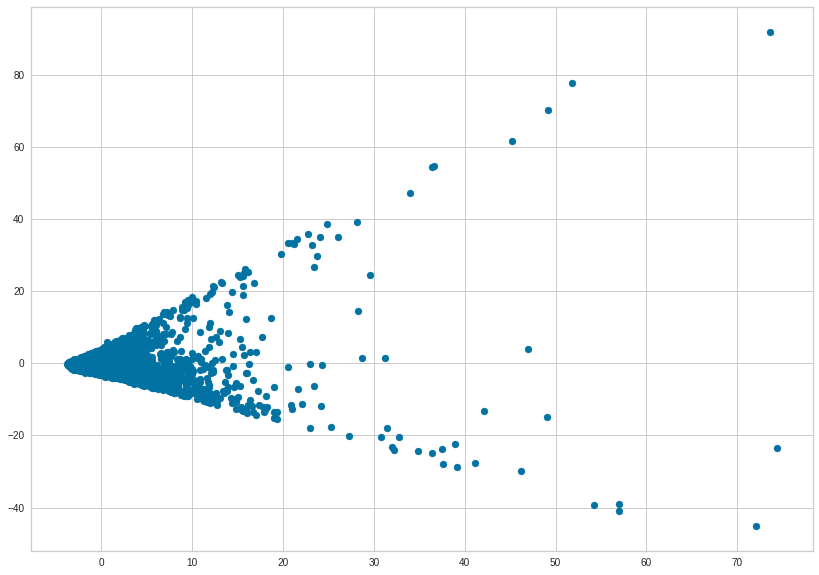

In [ ]:
plt.figure(figsize=(14, 10))
plt.scatter(reduced_X['PC1'], reduced_X['PC2'])
plt.show()

# K-MEANS

### Elbow Method
Elbow method adalah metode yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

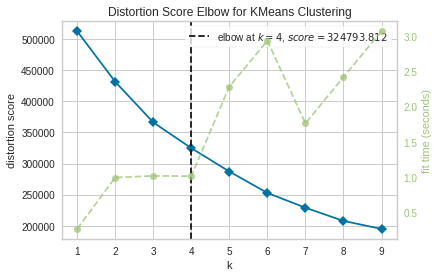

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans() 
visualizer = KElbowVisualizer(model, k=(1,10)) 
 
visualizer.fit(X) # Fit the data to the visualizer 
visualizer.show() # Finalize and render the figure 

Berdasarkan plot metode elbow, dapat dilihat bahwa cluster berjumlah 4 adalah yang paling optimal.

### Clustering with K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
model_fit = kmeans.fit(X)

In [ ]:
cluster = kmeans.predict(X)

In [ ]:
reduced_X['cluster'] = cluster
reduced_X

,PC1,PC2,cluster
0,-2.587905,0.074178,1
1,-0.227683,1.786422,3
2,-0.195094,-0.332681,1
3,-0.636558,-1.042587,1
4,-2.197461,0.302411,1
...,...,...,...
8945,-2.249047,-0.825042,1
8946,-2.133513,0.170079,1
8947,-2.691609,-0.393296,1
8948,-2.973620,-0.126656,1


In [ ]:
reduced_centers = pca.transform(model_fit.cluster_centers_)
reduced_centers

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[12.61429443, -7.26004091],
       [-0.98777065, -0.41630345],
       [24.09014719, 34.06794492],
       [ 1.37546135,  2.81576309]])

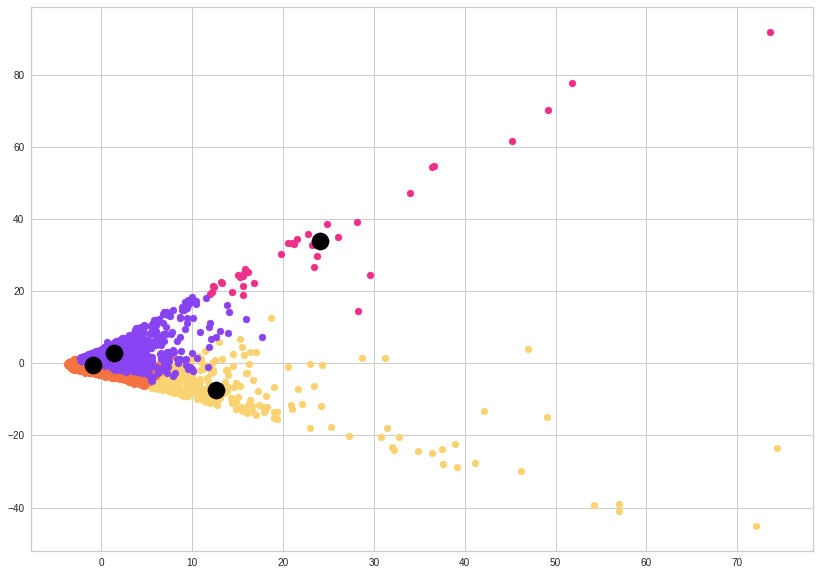

In [ ]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 0].loc[:, 'PC2'], color='#F9D371')
plt.scatter(reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 1].loc[:, 'PC2'], color='#F47340')
plt.scatter(reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 2].loc[:, 'PC2'], color='#EF2F88')
plt.scatter(reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == 3].loc[:, 'PC2'], color='#8843F2')

plt.scatter(reduced_centers[:,0], reduced_centers[:, 1], color='black', marker='o', s=300)

plt.show()

# Exploratory Data Analysis (EDA)

In [ ]:
df['cluster'] = cluster

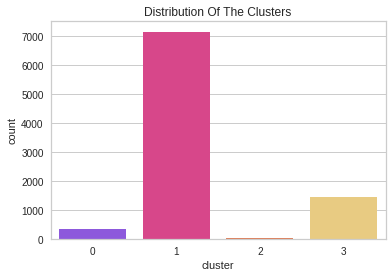

In [ ]:
#Plotting countplot of clusters
colors = ["#8843F2","#EF2F88","#F47340", "#F9D371"]
pl = sns.countplot(x=df["cluster"], palette= colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

**Segmentasi Pasar:**
- Pengguna Lumayan Sedikit [0]
- Pengguna Terbanyak [1]
- Pengguna Paling Sedikit [2]
- Pengguna Lumayan Banyak [3]

In [ ]:
eval_df = df.replace({
    'cluster': {
        0: 'Pengguna Lumayan Sedikit',
        1: 'Pengguna Terbanyak',
        2: 'Pengguna Paling Sedikit',
        3: 'Pengguna Lumayan Banyak'
        }
})
eval_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Pengguna Terbanyak
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Pengguna Lumayan Banyak
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Pengguna Terbanyak
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,Pengguna Terbanyak
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Pengguna Terbanyak


### Feature Importance

Mengetahui fitur apa saja yang memiliki pengaruh besar terhadap target yang kita prediksi pada modelling adalah suatu keharusan, dengan informasi ini bisa membuat kita lebih baik dalam melakukan analisa dan jadi lebih mengerti juga tentang data itu sendiri. Pengetahuan tentang fitur penting dalam data juga akan membantu kita memilih (features selection) yang paling tepat digunakan dalam modelling nantinya.

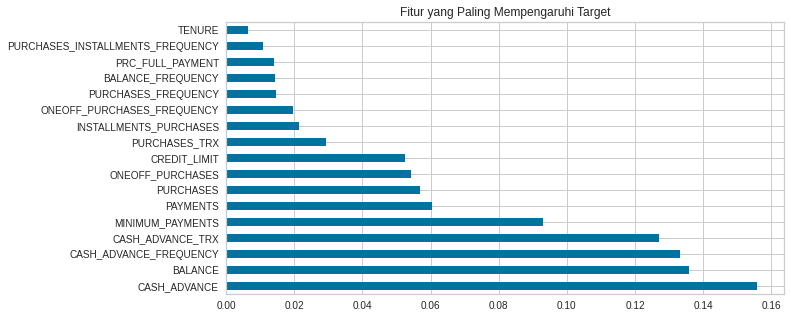

In [ ]:
X = eval_df.drop(['cluster'], axis=1)
y = eval_df['cluster']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Fitur yang Paling Mempengaruhi Target")

plt.show()

## Cash Advance & Balance Analysis

Penjelasan:
- Cash advance artinya tarik tuna. Nah! cash advance menggunakan uang tunai hasil penarikan dari kartu kredit yang sebenarnya bukan uang milik anda. Jadi anda harus melakukan pembayaran layaknya pembelian menggunakan kartu kredit. Bedanya yang anda beli dari fitur cash advance adalah uang tunai, bukan barang ataupun jasa
- Balance merupakan jumlah saldo yang tersisa dan tersimpan dalam rekening kartu kredit seseorang.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


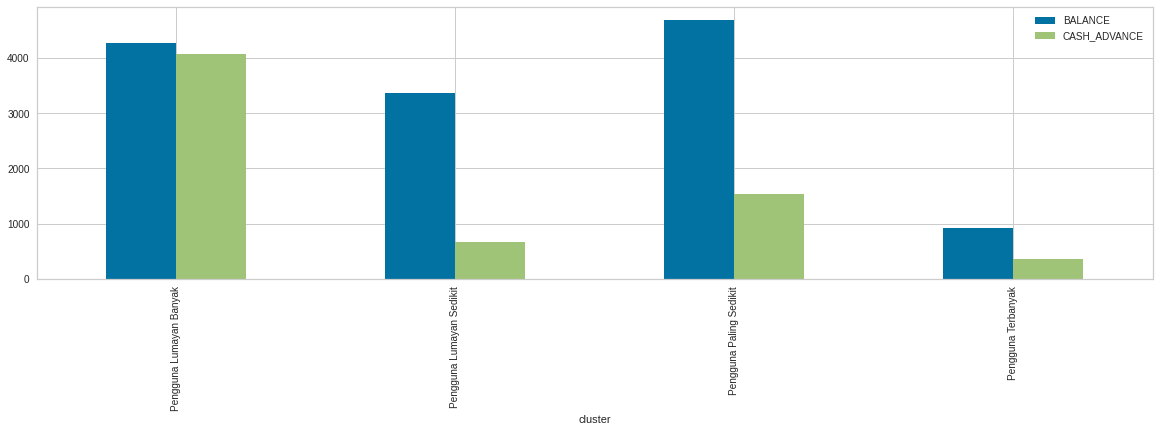

In [ ]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

**Mari kita cek angka rata-rata pembelian yang dilakukan tiap kelompok!**

In [ ]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,CASH_ADVANCE
cluster,,
Pengguna Lumayan Banyak,4269.303298,4080.760685
Pengguna Lumayan Sedikit,3371.939706,669.966188
Pengguna Paling Sedikit,4692.501114,1542.362039
Pengguna Terbanyak,918.363135,363.732099


In [ ]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,CASH_ADVANCE
cluster,,
Pengguna Lumayan Banyak,4.382924,0.0
Pengguna Lumayan Sedikit,150.952465,0.0
Pengguna Paling Sedikit,1418.254924,0.0
Pengguna Terbanyak,0.000000,0.0


In [ ]:
eval_df.groupby('cluster')['BALANCE', 'CASH_ADVANCE'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,CASH_ADVANCE
cluster,,
Pengguna Lumayan Banyak,16304.889250,47137.211760
Pengguna Lumayan Sedikit,19043.138560,19513.474830
Pengguna Paling Sedikit,14100.251100,20712.670080
Pengguna Terbanyak,9164.724752,6523.780195


## CASH ADVANCE & MINIMUM PAYMENTS

- **CASH_ADVANCE_FREQUENCY**, Seberapa sering uang tunai di muka dibayarkan
- **CASH_ADVANCE_TRX**, Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
- **MINIMUM_PAYMENTS**, Jumlah minimum pembayaran yang dilakukan oleh pengguna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


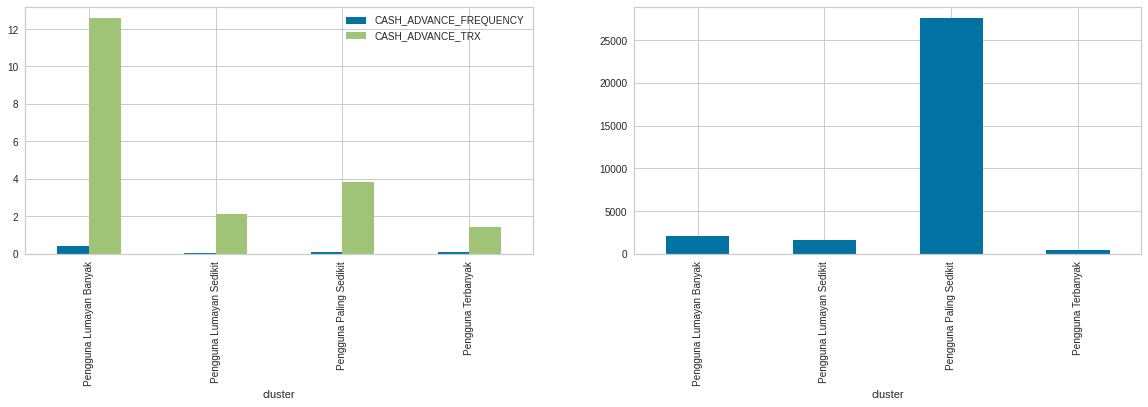

In [ ]:
ax = plt.subplot(2,2,1)
eval_df.groupby('cluster')['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'].mean().plot(kind='bar', figsize=(20,10) ,ax=ax)
ax = plt.subplot(2,2,2)
eval_df.groupby('cluster')['MINIMUM_PAYMENTS'].mean().plot(kind='bar', figsize=(20,10), ax=ax)
plt.show()

**Mari kita cek angka rata-rata cash advance dan balance kredit dari tiap kelompok!**

In [ ]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Pengguna Lumayan Banyak,2055.468217,12.562413
Pengguna Lumayan Sedikit,1579.558674,2.106383
Pengguna Paling Sedikit,27540.847373,3.842105
Pengguna Terbanyak,424.548857,1.417589


In [ ]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Pengguna Lumayan Banyak,16.950090,0
Pengguna Lumayan Sedikit,86.731068,0
Pengguna Paling Sedikit,15584.097420,0
Pengguna Terbanyak,0.019163,0


In [ ]:
eval_df.groupby('cluster')['MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,MINIMUM_PAYMENTS,CASH_ADVANCE_TRX
cluster,,
Pengguna Lumayan Banyak,14437.122090,123
Pengguna Lumayan Sedikit,18621.013310,62
Pengguna Paling Sedikit,76406.207520,36
Pengguna Terbanyak,4754.136596,23


# Purchases (Pengeluaran/Pembelian)

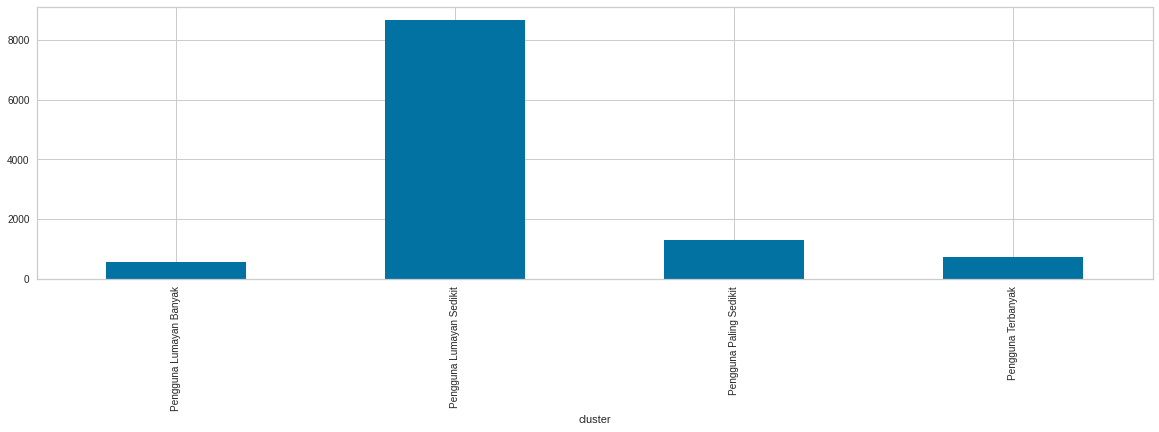

In [55]:
eval_df.groupby('cluster')['PURCHASES'].mean().plot(kind='bar', figsize=(20,5))
plt.show()

In [51]:
pd.DataFrame(eval_df.groupby('cluster')['PURCHASES'].mean())

,PURCHASES
cluster,
Pengguna Lumayan Banyak,579.205548
Pengguna Lumayan Sedikit,8669.277842
Pengguna Paling Sedikit,1294.756579
Pengguna Terbanyak,734.081459


# Kesimpulan

**Ringkasan strategi pemasaran:**
Berdasarkan clustering yang telah kami lakukan terhadap data pengguna credit card, terbagi 4 kelompok pengguna kartu kredit berdasarkan perilaku penggunaannya yaitu Pengguna Terbanyak, Pengguna Lumayan Banyak, Pengguna Lumayan Sedikit, dan Pengguna Paling Sedikit. Untuk memposisikan bisnis kami sebagai pilihan yang terjangkau bagi konsumen lokal, kami berencana untuk fokus pada konsumen kelas menengah yaitu Pengguna Terbanyak dan Pengguna Lumayan Banyak.

**Kriteria segmen pasar:**
- Seberapa sering pengguna melakukan pembelian produk?
- Seberapa sering pengguna melakukan penarikan tunai?
- Berapa jumlah rata-rata sisa saldo pengguna?
- Berapa jumlah rata-rata penarikan tunai yang dilakukan pengguna?
- Berapa jumlah rata-rata minimum pembayaran yang dilakukan pengguna?

**Pengguna Terbanyak**

Pangsa Pelanggan: 79%

Pengeluaran: $734 per bulan

Karakteristik utama:
- Kebiasaan berbelanja: Kadang-Kadang.
- Sangat jarang melakukan penarikan tunai.
- Rata-rata sisa saldo di rekeningnya sebesar $918 per bulan.

- Rata-rata penarikan tunai yang dilakukan sebesar $364 per bulan.

- Rata-rata jumlah transaksi dengan penarikan tunai adalah 1 transaksi perbulan.
- Rata-rata minimum pembayaran yang dilakukan sebesar $424 per bulan.

**Pengguna Lumayan Banyak**

Pangsa Pelanggan: 16%

Pengeluaran: $579 per bulan

Karakteristik utama:
- Kebiasaan berbelanja: Jarang.
- Cukup sering melakukan penarikan tunai.
- Rata-rata sisa saldo di rekeningnya sebesar $4,269 per bulan.

- Rata-rata penarikan tunai yang dilakukan sebesar $4,080 per bulan.

- Rata-rata jumlah transaksi dengan penarikan tunai adalah 12 transaksi perbulan.
- Rata-rata minimum pembayaran yang dilakukan sebesar $2,055 per bulan.

**Pengguna Lumayan Sedikit**

Pangsa Pelanggan: 3%

Pengeluaran: $8,669 per bulan

Karakteristik utama:
- Kebiasaan berbelanja: Sangat Sering.
- Sangat jarang melakukan penarikan tunai.
- Rata-rata sisa saldo di rekeningnya sebesar $3,372 per bulan.

- Rata-rata penarikan tunai yang dilakukan sebesar $669 per bulan.

- Rata-rata jumlah transaksi dengan penarikan tunai adalah 2 transaksi perbulan.
- Rata-rata minimum pembayaran yang dilakukan sebesar $1,579 per bulan.

**Pengguna Paling Sedikit**

Pangsa Pelanggan: 2%

Pengeluaran: $1,295 per bulan

Karakteristik utama:
- Kebiasaan berbelanja: Kadang-Kadang.
- Jarang melakukan penarikan tunai.
- Rata-rata sisa saldo di rekeningnya sebesar $4,692 per bulan.

- Rata-rata penarikan tunai yang dilakukan sebesar $1,542 per bulan.

- Rata-rata jumlah transaksi dengan penarikan tunai adalah 4 transaksi perbulan.
- Rata-rata minimum pembayaran yang dilakukan sebesar $27,540 per bulan.

### Predictive Model

In [ ]:
b = df['BALANCE']
ca = df['CASH_ADVANCE']
caf = df['CASH_ADVANCE_FREQUENCY']
catx = df['CASH_ADVANCE_TRX']
mpy = df['MINIMUM_PAYMENTS']
pur = df['PURCHASES']

features = list(zip(b, ca, caf, catx, mpy, pur))
label = df['cluster']

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(features, label)

pred = rf.predict(features)

In [ ]:
print("Random Forest:", accuracy_score(label, pred))

Random Forest: 1.0


In [ ]:
data_model = pd.DataFrame({'Actual':label, 'Predicted':pred})
data_model.head()

,Actual,Predicted
0,1,1
1,3,3
2,1,1
3,1,1
4,1,1


### Predictive System

**Prediksi 1**

In [ ]:
input_data = pd.DataFrame([[10000,	100,
                            0, 20, 2000, 39000]])

sample = np.array(input_data)
sample_re = sample.reshape(1,-1)

prediction = rf.predict(sample_re)
print("Derajat kesehatan")
print("")
print("Jawaban:")
print(prediction)

if (prediction[0]==0):
  print("Pengguna Lumayan Sedikit")
elif (prediction[0]==1):  
  print("Pengguna Terbanyak")
elif (prediction[0]==2):  
  print("Pengguna Paling Sedikit")
else:
  print("Pengguna Lumayan Banyak")


Derajat kesehatan

Jawaban:
[0]
Pengguna Lumayan Sedikit


# Saving Model

In [ ]:
pickle.dump(kmeans, open('clustering.pkl', 'wb'))
pickle.dump(rf, open('prediction.pkl', 'wb'))